In [319]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [320]:
labour_market_overview = pd.read_csv('Processed_Data/Labour_Market_Overview.csv')
labour_market_overview['Year-Month']=pd.to_datetime(labour_market_overview['Year-Month'])
labour_market_overview.set_index('Year-Month', inplace=True)
labour_market_overview.index=labour_market_overview.index.to_period('M')
lmo_tech = labour_market_overview[['Information & communication']]
lmo_tech = lmo_tech.rename(columns={'Information & communication': 'Number of Workforce Jobs (1000s)'})
print(lmo_tech)

            Number of Workforce Jobs (1000s)
Year-Month                                  
1978-06                                  781
1978-09                                  783
1978-12                                  787
1979-03                                  789
1979-06                                  791
1979-09                                  793
1979-12                                  794
1980-03                                  791
1980-06                                  787
1980-09                                  777
1980-12                                  767
1981-03                                  757
1981-06                                  751
1981-09                                  745
1981-12                                  742
1982-03                                  740
1982-06                                  739
1982-09                                  730
1982-12                                  729
1983-03                                  729
1983-06   

C:\Users\M D'costa\AppData\Local\Temp\ipykernel_8812\2283150254.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


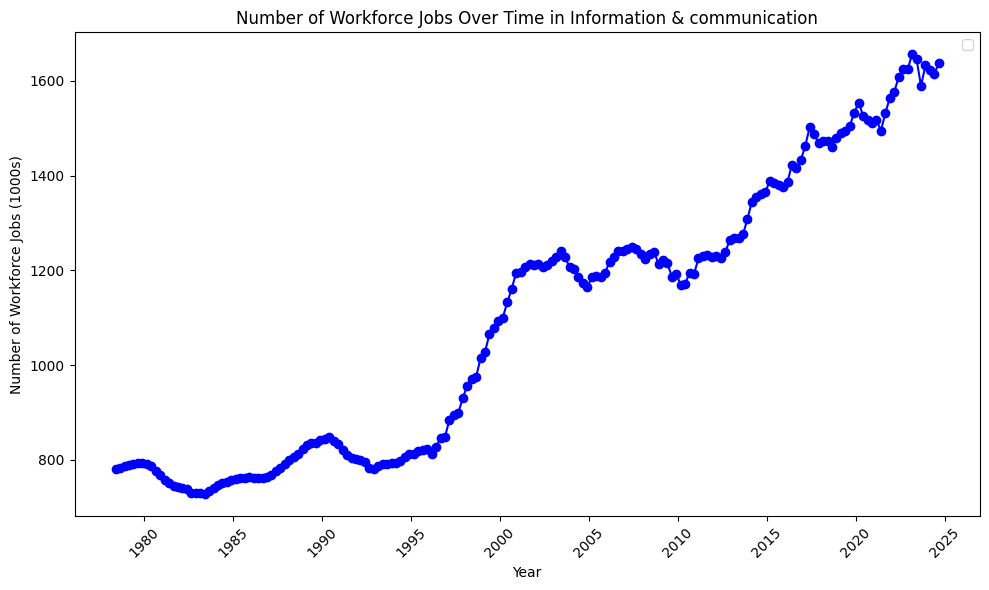

In [321]:
plt.figure(figsize=(10,6))
plt.plot(lmo_tech.index.to_timestamp(), lmo_tech['Number of Workforce Jobs (1000s)'], marker='o', color='b')
plt.title('Number of Workforce Jobs Over Time in Information & communication')
plt.xlabel('Year')
plt.ylabel('Number of Workforce Jobs (1000s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [322]:
emp13 = pd.read_excel('Raw_Data/emp13feb2025.xls', sheet_name=1, skiprows=5, nrows=123)
emp13 = emp13.rename(columns={'Unnamed: 0':'Date'})
emp13.set_index('Date', inplace=True)
emp13=emp13.drop(emp13.index[1:11])
emp13.index=emp13.index.str.replace(r'\s\[r\]','',regex=True) #replace [r] with empty string
emp13.index=emp13.index.str.replace(r'^[A-Za-z]{3}-','', regex=True) # Removes the starting months so the data can merge based on date with lmo_tech
emp13.index=pd.to_datetime(emp13.index, errors='coerce')
emp13.index=emp13.index.to_period('M')
emp13_tech=emp13[['Information & communication']]
emp13_tech = emp13_tech.rename(columns={'Information & communication': 'Number of People Employed'})
print(emp13_tech)

        Number of People Employed
Date                             
1997-03             742811.463903
1997-06             772783.632538
1997-09             773860.220009
1997-12             798529.553019
1998-03             828529.585284
1998-06              826116.86858
1998-09             845925.464043
1998-12             877607.739811
1999-03             896156.192495
1999-06             914770.150687
1999-09              939189.07257
1999-12             953733.263969
2000-03             969816.299272
2000-06             994833.300983
2000-09            1031614.939322
2000-12            1055549.553808
2001-03            1071391.068296
2001-06            1076429.058144
2001-09            1088802.462201
2001-12            1068321.744464
2002-03              1011182.2489
2002-06             990154.510871
2002-09            1011962.842934
2002-12            1018189.260462
2003-03            1004166.613318
2003-06            1010065.244175
2003-09            1033197.840706
2003-12       

C:\Users\M D'costa\AppData\Local\Temp\ipykernel_8812\2954210599.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  emp13.index=pd.to_datetime(emp13.index, errors='coerce')


C:\Users\M D'costa\AppData\Local\Temp\ipykernel_8812\1089017447.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


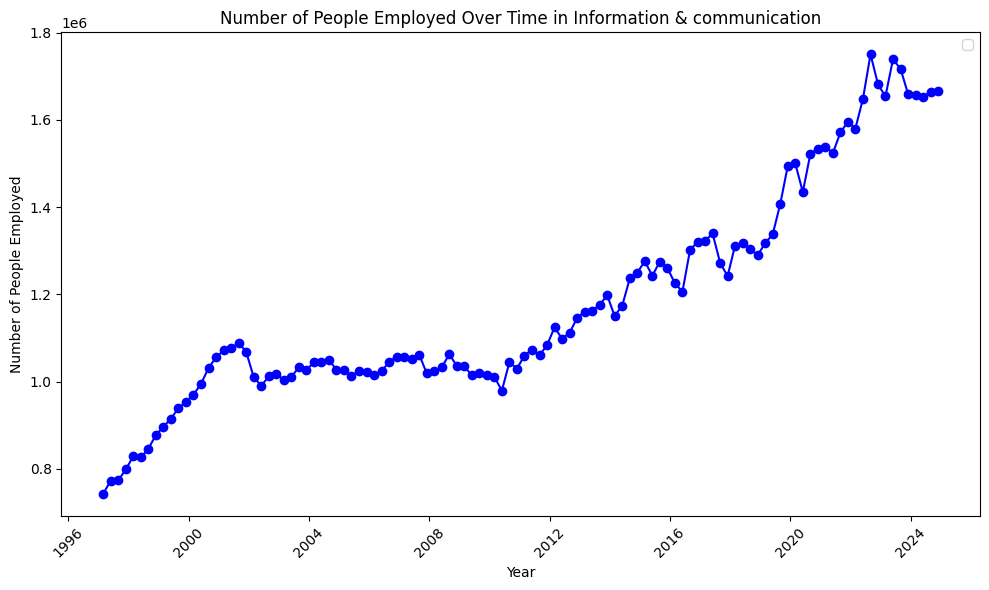

In [323]:
plt.figure(figsize=(10,6))
plt.plot(emp13_tech.index.to_timestamp(), emp13_tech['Number of People Employed'], marker='o', color='b')
plt.title('Number of People Employed Over Time in Information & communication')
plt.xlabel('Year')
plt.ylabel('Number of People Employed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [324]:
vacs02 = pd.read_excel('Raw_Data/vacs02apr2025.xlsx', header=None, sheet_name=0)
rows_to_drop=[0,1,4,5,6,7]
vacs02=vacs02.drop(vacs02.index[rows_to_drop]) #dropping rows indexed from the top that are blank or contain unnecessary data
vacs02=vacs02.iloc[:286] # removes rows at the bottom that are blank or contain unnecessary data
vacs02=vacs02.drop(vacs02.columns[1], axis=1)
vacs02.columns=vacs02.iloc[1]
vacs02=vacs02.iloc[2:]
vacs02 = vacs02.rename(columns={'SIC 2007 sections': 'Date'})
vacs02.set_index('Date', inplace=True)
vacs02.index=vacs02.index.str.replace(r'^[A-Za-z]{3}-','', regex=True)
vacs02.index=pd.to_datetime(vacs02.index, errors='coerce')
vacs02.index=vacs02.index.to_period('M')
vacs02_tech = vacs02[['Information & communication']]
print(vacs02_tech)

C:\Users\M D'costa\AppData\Local\Temp\ipykernel_8812\2607310748.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vacs02.index=pd.to_datetime(vacs02.index, errors='coerce')


3       Information & communication
Date                               
2001-06                          50
2001-07                          48
2001-08                          47
2001-09                          46
2001-10                          44
2001-11                          43
2001-12                          40
2002-01                          41
2002-02                          42
2002-03                          43
2002-04                          44
2002-05                          44
2002-06                          44
2002-07                          45
2002-08                          45
2002-09                          43
2002-10                          40
2002-11                          40
2002-12                          40
2003-01                          42
2003-02                          42
2003-03                          42
2003-04                          40
2003-05                          40
2003-06                          39
2003-07                     

In [325]:
# Only want March, June, September, December data so the dates can match up with the other datasets
# Can easily do this as the dates are in date time format

vacs02_tech=vacs02_tech[vacs02_tech.index.month.isin([3,6,9,12])] # 3,6,9,12 correspond to the months wanted (March, June, September and December)

# Make Information and Communication a column and rename the column it to "number of vacancies"
vacs02_tech.columns = ['Information & communication'] # Removes the 3 (as the sectors were in the third row and were not treated as columns before)
vacs02_tech = vacs02_tech.rename(columns={'Information & communication': 'Number of Vacancies (1000s)'})

print(vacs02_tech)

        Number of Vacancies (1000s)
Date                               
2001-06                          50
2001-09                          46
2001-12                          40
2002-03                          43
2002-06                          44
2002-09                          43
2002-12                          40
2003-03                          42
2003-06                          39
2003-09                          39
2003-12                          41
2004-03                          42
2004-06                          44
2004-09                          46
2004-12                          47
2005-03                          42
2005-06                          42
2005-09                          39
2005-12                          39
2006-03                          40
2006-06                          40
2006-09                          40
2006-12                          40
2007-03                          41
2007-06                          43
2007-09                     

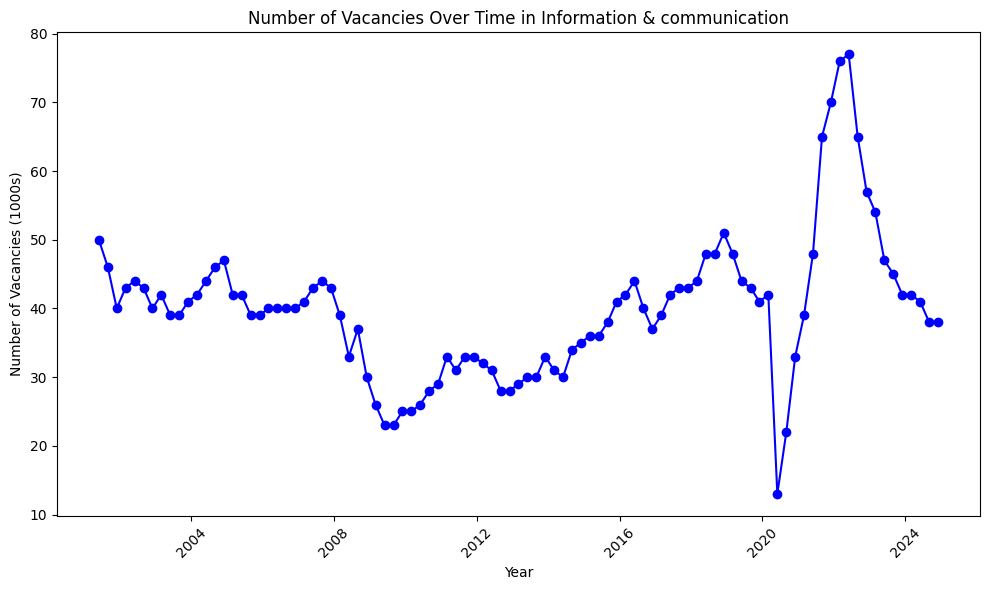

In [326]:
plt.figure(figsize=(10,6))
plt.plot(vacs02_tech.index.to_timestamp(), vacs02_tech['Number of Vacancies (1000s)'], marker='o', color='b')
plt.title('Number of Vacancies Over Time in Information & communication')
plt.xlabel('Year')
plt.ylabel('Number of Vacancies (1000s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [327]:
# Merge Datasets

# Check lengths of the datasets

# Have all datasets start from June 2001 and finish at September 2024

